In [20]:
import pandas as pd
#read the data
dataset = pd.read_csv('Final.csv')
dataset.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B,Label
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440,0
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492,0
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172,0
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759,0
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314,0


In [21]:
#find the number of uniques values in Label
dataset['Label'].value_counts()

1    620
0    430
Name: Label, dtype: int64

In [22]:
#classify data into dependent and indepedent variables
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]

In [23]:

#classify the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


#scale using normalization
from sklearn.preprocessing import Normalizer, StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



#now predict using svm classifier
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier()

#fit the model
RF_classifier.fit(x_train, y_train)
pred = RF_classifier.predict(x_test)

#lets now find the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy for main data is ", accuracy_score(pred, y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_test)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

The accuracy for main data is  0.9682539682539683
[[125   6]
 [  4 180]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       131
           1       0.97      0.98      0.97       184

    accuracy                           0.97       315
   macro avg       0.97      0.97      0.97       315
weighted avg       0.97      0.97      0.97       315



<Axes: >

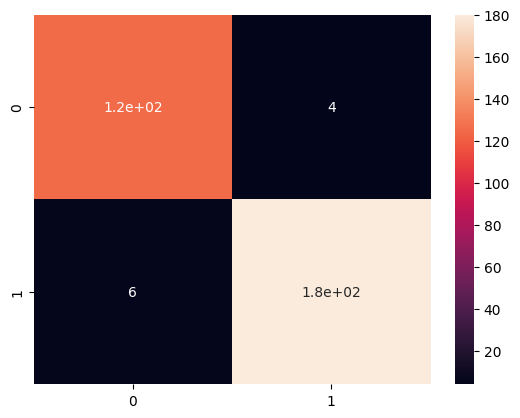

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

cm = confusion_matrix(y_test, pred)
sb.heatmap(cm, annot = True)

[Text(0, 0.5, 'Health'), Text(0, 1.5, 'Unhealthy')]

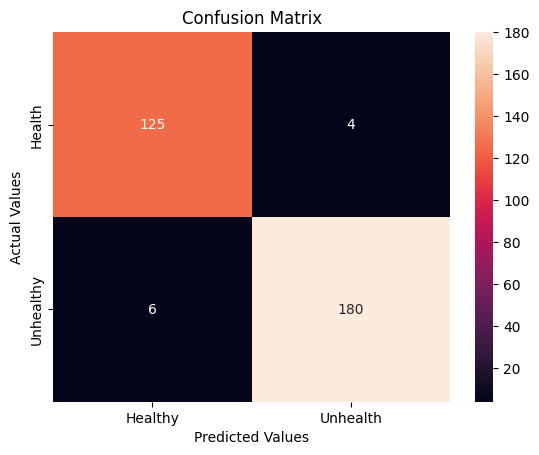

In [25]:
#now confusion matrix with labels
import matplotlib.pyplot as plt

ax= plt.subplot()
sb.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Healthy', 'Unhealth']); ax.yaxis.set_ticklabels(['Health', 'Unhealthy'])